 #                                        Project Name - Hotel Booking Analysis

# Project Summary

*This project analyzes a dataset of hotel bookings to uncover patterns and insights that can enhance revenue management and customer satisfaction. By examining factors such as deposit types, booking channels, lead times, and guest preferences, the study aims to identify key drivers of booking behavior and cancellation rates, ultimately informing strategies to optimize pricing, booking policies, and channel utilization.*

# Github Link

[GitHub Link](https://github.com/Chandra-kanth-J/-Hotel-Booking-Analysis.git)

# Problem Statement

 *This study aims to explore the impact of various factors on hotel booking behaviors and outcomes to optimize revenue and enhance customer satisfaction. Specifically, it investigates how different deposit types (refundable, non-refundable, or no deposit) affect cancellation rates, the distribution of hotel bookings across different years, and whether repeated guests exhibit specific meal preferences or tend to book longer stays. Additionally, it examines which channels are predominantly used for early bookings, whether bookings made through different channels vary in cancellation rates or lead times, the relationship between lead time and cancellation rates, and if the average daily rate (ADR) differs significantly between resort and city hotels. These insights are crucial for developing strategies that improve booking stability and revenue management.*

#Let's Begin !

##1. Know Your Data

In [ ]:
#Importing the library

import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import seaborn as sns  # Importing Seaborn for statistical data visualization

In [ ]:
# Reading the CSV file into a DataFrame using Pandas
df = pd.read_csv('/content/Hotel Bookings (1).csv')

In [ ]:
# Display the first 5 rows of the DataFrame to get a preview of the data
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Display the last 5 rows of the DataFrame to get a preview of the data at the end
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# Display the column names and their indices
print('List of the columns in the Hotel Booking DataFrame:')
for i, column in enumerate(df.columns):
    print(f'{i+1}. {column}')
print("\n")

List of the columns in the Hotel Booking DataFrame:
1. hotel
2. is_canceled
3. lead_time
4. arrival_date_year
5. arrival_date_month
6. arrival_date_week_number
7. arrival_date_day_of_month
8. stays_in_weekend_nights
9. stays_in_week_nights
10. adults
11. children
12. babies
13. meal
14. country
15. market_segment
16. distribution_channel
17. is_repeated_guest
18. previous_cancellations
19. previous_bookings_not_canceled
20. reserved_room_type
21. assigned_room_type
22. booking_changes
23. deposit_type
24. agent
25. company
26. days_in_waiting_list
27. customer_type
28. adr
29. required_car_parking_spaces
30. total_of_special_requests
31. reservation_status
32. reservation_status_date




In [ ]:
# Display concise summary of the DataFrame
print("Summary of the DataFrame:")
df.info()

Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int

***NOTE:-***
The code contains one column which may cause over-analysis complications, particularly since it has only 6,797 non-null entries, indicating a relatively high number of null values.

In [ ]:
# Remove the 'company' column
df = df.drop(columns=['company'])
print("Column 'company' removed.")

Column 'company' removed.


In [ ]:
# Display summary statistics of the DataFrame
print("Descriptive statistics of the DataFrame:")
print(df.describe())

Descriptive statistics of the DataFrame:
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75

In [ ]:
# Display the shape of the DataFrame
num_rows, num_columns = df.shape
print(f'Number of Columns in the DataFrame: {num_columns}')
print(f'Number of Rows in the DataFrame: {num_rows}')

Number of Columns in the DataFrame: 31
Number of Rows in the DataFrame: 119390


## 2. Understanding Your Variables


In [ ]:
# Understanding each variable
print("Understanding each variable:")
for column in df.columns:
    print(f"\nColumn: {column}")
    print(f"Data Type: {df[column].dtype}")
    print(f"Number of Unique Values: {df[column].nunique()}")
    if df[column].dtype:
        print(f"Unique Values: {df[column].unique()[:10]}")  # Show only the first 10 unique values


Understanding each variable:

Column: hotel
Data Type: object
Number of Unique Values: 2
Unique Values: ['Resort Hotel' 'City Hotel']

Column: is_canceled
Data Type: int64
Number of Unique Values: 2
Unique Values: [0 1]

Column: lead_time
Data Type: int64
Number of Unique Values: 479
Unique Values: [342 737   7  13  14   0   9  85  75  23]

Column: arrival_date_year
Data Type: int64
Number of Unique Values: 3
Unique Values: [2015 2016 2017]

Column: arrival_date_month
Data Type: object
Number of Unique Values: 12
Unique Values: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April']

Column: arrival_date_week_number
Data Type: int64
Number of Unique Values: 53
Unique Values: [27 28 29 30 31 32 33 34 35 36]

Column: arrival_date_day_of_month
Data Type: int64
Number of Unique Values: 31
Unique Values: [ 1  2  3  4  5  6  7  8  9 10]

Column: stays_in_weekend_nights
Data Type: int64
Number of Unique Values: 17
Unique Values: [ 0  1  2  4  3  6 1

##3. Data Wrangling


In [ ]:
# Check for null values
print("Checking for null values in each column:")
null_values = df.isnull().sum()
print(null_values)
print("\n")

Checking for null values in each column:
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340

In [ ]:
# Remove rows with null values
df_cleaned = df.dropna()
print("Rows with null values removed.")
print(f'New shape of the DataFrame: {df_cleaned.shape}')
print("\n")

Rows with null values removed.
New shape of the DataFrame: (102894, 31)




In [ ]:
# Display concise summary after removing all the null values of the DataFrame
print("Summary of the DataFrame after removing null values:")
df_cleaned.info()

Summary of the DataFrame after removing null values:
<class 'pandas.core.frame.DataFrame'>
Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  object 
 1   is_canceled                     102894 non-null  int64  
 2   lead_time                       102894 non-null  int64  
 3   arrival_date_year               102894 non-null  int64  
 4   arrival_date_month              102894 non-null  object 
 5   arrival_date_week_number        102894 non-null  int64  
 6   arrival_date_day_of_month       102894 non-null  int64  
 7   stays_in_weekend_nights         102894 non-null  int64  
 8   stays_in_week_nights            102894 non-null  int64  
 9   adults                          102894 non-null  int64  
 10  children                        102894 non-null  float64
 11  babies                        

## 4. Data Vizualization, Storytelling & Experimenting with charts: Understand the relationships between variables


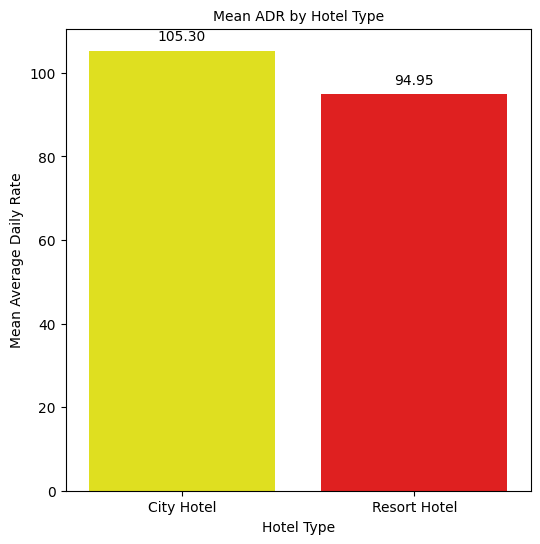


Summary:
The mean Average Daily Rate (ADR) for each hotel type is as follows:
- City Hotel: 105.30
- Resort Hotel: 94.95

Resort Hotel is best for the pocket friendly...



In [ ]:
# @title Does the price (adr) vary significantly between different types of hotels (Resort vs. City Hotel)?
mean_adr = df.groupby('hotel')['adr'].mean().reset_index()

# Define a custom color palette with yellow and red
custom_palette = ['yellow', 'red']

# Plotting ADR by hotel type using a bar chart
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='hotel', y='adr', hue='hotel', data=mean_adr, palette=custom_palette, dodge=False, legend=False)

# Add titles and labels
plt.title('Mean ADR by Hotel Type', fontsize=10)
plt.xlabel('Hotel Type', fontsize=10)
plt.ylabel('Mean Average Daily Rate', fontsize=10)

# Annotate the bars with the mean values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

# Display the bar chart
plt.show()

# Summary
city_hotel_adr = round(mean_adr.loc[mean_adr['hotel'] =='City Hotel','adr'].values[0],2)
resort_hotel_adr = round(mean_adr.loc[mean_adr['hotel'] =='Resort Hotel','adr'].values[0],2)

summary = f"""
Summary:
The mean Average Daily Rate (ADR) for each hotel type is as follows:
- City Hotel: {city_hotel_adr:.2f}
- Resort Hotel: {resort_hotel_adr:.2f}

Resort Hotel is best for the pocket friendly...
"""

print(summary)

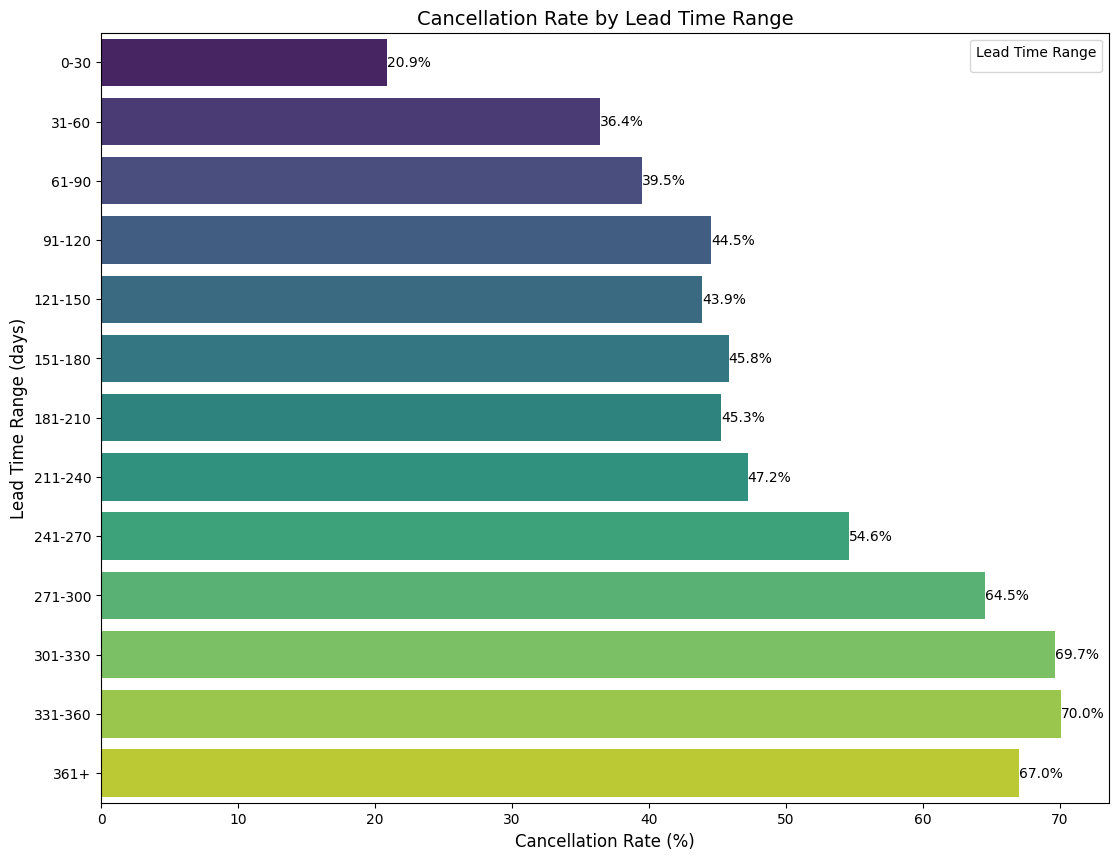


Summary:
Shorter Lead Time = Lower Cancellation Risk: A shorter lead time means less time for your plans to change,
thus reducing the likelihood of needing to cancel your booking.



In [ ]:
# @title 2.	What is the relationship between lead time and cancellation rate? Are bookings made further in advance more or less likely to be canceled?

# Create a new column 'lead_time_range' to categorize lead times into ranges
df['lead_time_range'] = pd.cut(df['lead_time'], bins=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 1000],
                               labels=['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240',
                                       '241-270', '271-300', '301-330', '331-360', '361+'])

# Calculate cancellation rate for each lead time range
cancellation_rate = df.groupby('lead_time_range')['is_canceled'].mean().reset_index()

# Rename the columns for better readability
cancellation_rate.columns = ['Lead Time Range', 'Cancellation Rate'] #the cancellation rate coming in the decimal format i want that in percentage f
# print(cancellation_rate) #To see the value just run this code to see the Cancellation Rate Table

# Calculate cancellation rate as a percentage for each lead time range
cancellation_rate = (df.groupby('lead_time_range')['is_canceled'].mean() * 100).reset_index()
cancellation_rate.columns = ['Lead Time Range', 'Cancellation Rate (%)']

plt.figure(figsize=(13, 10))
ax = sns.barplot(y='Lead Time Range', x='Cancellation Rate (%)', data=cancellation_rate, hue='Lead Time Range', palette='viridis', dodge=False, orient='h')


# Add percentage labels to the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_width() + 0.01
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), va='center')

# Add titles and labels
plt.title('Cancellation Rate by Lead Time Range', fontsize=14)
plt.ylabel('Lead Time Range (days)', fontsize=12)
plt.xlabel('Cancellation Rate (%)', fontsize=12)
plt.xlim(0, None)
plt.legend(title='Lead Time Range')

plt.show()

summary_1 = f"""
Summary:
Shorter Lead Time = Lower Cancellation Risk: A shorter lead time means less time for your plans to change,
thus reducing the likelihood of needing to cancel your booking.
"""

print(summary_1)

<ipython-input-135-555e606a1ef8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='distribution_channel', y='lead_time',  data=df, palette='viridis', legend=False)


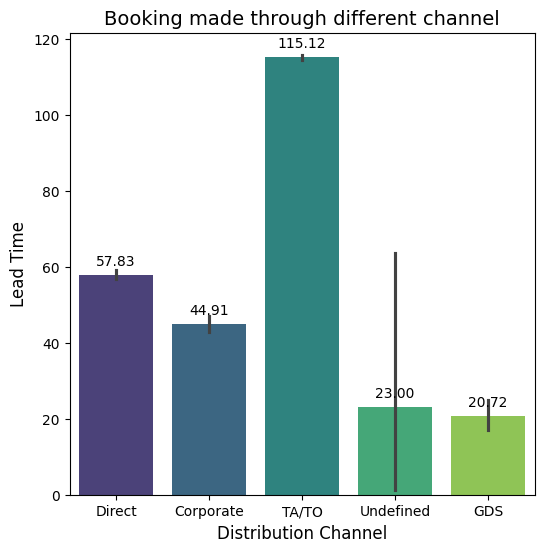


Summary:-
The TA/TO (Travel Agent/Tour Operator) channel has the highest average lead time of 115.12 days, 
indicating that bookings made through this channel are typically planned well in advance compared to other channels.

Bookings categorized under the Undefined channel have an average lead time of 23.00 days, similar to the GDS channel, 
indicating a short lead time for these bookings.

The GDS (Global Distribution System) channel has a lower average lead time of 20.72 days,
implying that bookings through GDS are generally made closer to the travel date.

From the above chart, we can conclude the following cancellation rates:
- TA/TO: 64%
- Direct: 55.6%
- Corporate: 55.6%
- GDS: 55.6%
- Undefined: 32.5%

We should consider other options besides Travel Agent/Tour Operator due to their high lead time and high cancellation rate.




In [ ]:
# @title 3.	Do bookings made through different channels (e.g., online travel agencies, direct, corporate) have different cancellation rates or lead times?

plt.figure(figsize=(6,6))

ax = sns.barplot(x='distribution_channel', y='lead_time',  data=df, palette='viridis', legend=False)

plt.xlabel('Distribution Channel', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)
plt.title('Booking made through different channel', fontsize=14)

# Annotate the bars with the mean values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()

summary_2 = '''
Summary:-
The TA/TO (Travel Agent/Tour Operator) channel has the highest average lead time of 115.12 days,
indicating that bookings made through this channel are typically planned well in advance compared to other channels.

Bookings categorized under the Undefined channel have an average lead time of 23.00 days, similar to the GDS channel,
indicating a short lead time for these bookings.

The GDS (Global Distribution System) channel has a lower average lead time of 20.72 days,
implying that bookings through GDS are generally made closer to the travel date.

From the above chart, we can conclude the following cancellation rates:
- TA/TO: 64%
- Direct: 55.6%
- Corporate: 55.6%
- GDS: 55.6%
- Undefined: 32.5%

We should consider other options besides Travel Agent/Tour Operator due to their high lead time and high cancellation rate.

'''

print(summary_2)

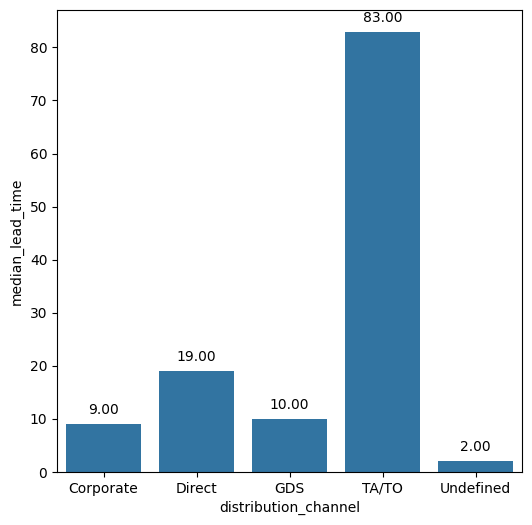


Summary:-

The TA/TO (Travel Agent/Tour Operator) channel has the highest average planned well in advance compared
to other channels.

Undefined channel is used when they there is shortest time to get the booking.
That mean that they use this booking when the time is less...



In [ ]:
# @title 4. Which channel is mostly used for early booking of hotels?

group_by_dc = df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})

plt.figure(figsize = (6,6))
at = sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])

# Annotate the bars with the mean values
for p in at.patches:
    height = p.get_height()
    at.annotate(f'{height:.2f}',
                xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')
plt.show()

summary_3 = '''
Summary:-

The TA/TO (Travel Agent/Tour Operator) channel has the highest average planned well in advance compared
to other channels.

Undefined channel is used when they there is shortest time to get the booking.
That mean that they use this booking when the time is less...
'''

print(summary_3)


In [ ]:
# @title 5.	Are repeated guests more likely to book longer stays ?

# Create a copy of df for data cleaning and manipulation
df_cleaned = df.copy()

# Calculate total stay by adding stays_in_weekend_nights and stays_in_week_nights
df_cleaned['total_stay'] = df_cleaned['stays_in_weekend_nights'] + df_cleaned['stays_in_week_nights']

# Group by 'is_repeated_guest' and calculate the mean of 'total_stay'
agg_df_stay = df_cleaned.groupby('is_repeated_guest')['total_stay'].mean().reset_index()

# Rename columns for better readability
agg_df_stay = agg_df_stay.rename(columns={'is_repeated_guest': 'Guest Type', 'total_stay': 'Average Total Stay'})

# Replace 0 and 1 with 'Not Repeated' and 'Repeated' for guest types
agg_df_stay['Guest Type'] = agg_df_stay['Guest Type'].replace({0: 'Not Repeated', 1: 'Repeated'})

# Group by 'is_repeated_guest' and count occurrences of 'reserved_room_type'
agg_df_room = df_cleaned.groupby(['is_repeated_guest', 'reserved_room_type']).size().reset_index(name='count')

# Calculate percentages for room types
agg_df_room = agg_df_room.groupby('is_repeated_guest', group_keys=True).apply(
    lambda x: x.assign(percentage_room_type=round(100 * x['count'] / x['count'].sum(), 2))).reset_index(drop=True)

# Rename columns for better readability
agg_df_room = agg_df_room.rename(columns={'is_repeated_guest': 'Guest Type', 'reserved_room_type': 'Room Type', 'percentage_room_type': 'Percentage Room Type'})

# Replace 0 and 1 with 'Not Repeated' and 'Repeated' for guest types
agg_df_room['Guest Type'] = agg_df_room['Guest Type'].replace({0: 'Not Repeated', 1: 'Repeated'})

# Print results
print("Average Total Stay by Guest Type")
print(agg_df_stay.to_markdown(index=False, numalign="left", stralign="left"))

print("\nRoom Type Distribution by Guest Type")
print(agg_df_room.to_markdown(index=False, numalign="left", stralign="left"))

#adding of the week_nights stay and weeked_nights to get the total_stay
df_cleaned['total_stay'] = df_cleaned['stays_in_week_nights']+ df_cleaned['stays_in_weekend_nights']

#For the Visualization i am creating function so that i can call the func
#when its needed


#Box Plot of Total Stay by Guest Type
def box_plot():
    # Calculate the IQR
    Q1 = df_cleaned['total_stay'].quantile(0.25)
    Q3 = df_cleaned['total_stay'].quantile(0.75)
    IQR = Q3 - Q1

    # Filter the data to remove outliers
    df_filtered = df_cleaned[~((df_cleaned['total_stay'] < (Q1 - 1.5 * IQR)) | (df_cleaned['total_stay'] > (Q3 + 1.5 * IQR)))]

    # Box Plot for Total Stay by Guest Type without Outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_repeated_guest', y='total_stay', hue='is_repeated_guest', data=df_filtered, palette='viridis', legend=False)
    plt.xticks([0, 1], ['Not Repeated', 'Repeated'])
    plt.title('Box Plot of Total Stay by Guest Type')
    plt.xlabel('Guest Type')
    plt.ylabel('Total Stay (Nights)')
    plt.legend([],[], frameon=False)
    plt.show()

#Violin Plot of Total Stay by Guest Type
def violin_plot():
    # Filter the data to remove outliers
    df_filtered = df_cleaned[~((df_cleaned['total_stay'] < (Q1 - 1.5 * IQR)) | (df_cleaned['total_stay'] > (Q3 + 1.5 * IQR)))]

    # Violin Plot for Total Stay by Guest Type without Outliers
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='is_repeated_guest', y='total_stay', hue='is_repeated_guest', data=df_filtered, palette='viridis', legend=False)
    plt.xticks([0, 1], ['Not Repeated', 'Repeated'])
    plt.title('Violin Plot of Total Stay by Guest Type')
    plt.xlabel('Guest Type')
    plt.ylabel('Total Stay (Nights)')
    plt.legend([],[], frameon=False)
    plt.show()

#Room Type Distribution for Repeated and Non-Repeated Guests By Donut Chart
def donut_chart():
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Pie Chart for Room Type Distribution by Guest Type
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    agg_df_room_pie = agg_df_room.groupby('Guest Type')

    for (key, ax) in zip(agg_df_room_pie.groups.keys(), axes.flatten()):
        subset = agg_df_room_pie.get_group(key)
        wedges, texts = ax.pie(subset['Percentage Room Type'], labels=subset['Room Type'], colors=sns.color_palette('tab20', len(subset)), startangle=140)

        # Draw a circle at the center of pie to make it look like a donut
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        ax.add_artist(centre_circle)

        # Equal aspect ratio ensures that pie is drawn as a circle
        ax.axis('equal')
        ax.set_title(f'Room Type Distribution for {key} Guests')

        # Create custom legend labels with percentages
        legend_labels = [f'{rt}: {pct:.1f}%' for rt, pct in zip(subset['Room Type'], subset['Percentage Room Type'])]

        # Add a legend
        ax.legend(wedges, legend_labels, loc="best", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()

# Stacked Area Chart for Room Type Distribution by Guest Type
def Stacked_Chart():
    agg_df_room_pivot = agg_df_room.pivot(index='Room Type', columns='Guest Type', values='Percentage Room Type').fillna(0)
    agg_df_room_pivot.plot(kind='area', stacked=True, figsize=(14, 7), colormap='viridis')
    plt.title('Stacked Area Chart of Room Type Distribution by Guest Type')
    plt.xlabel('Room Type')
    plt.ylabel('Percentage of Room Type')
    plt.legend(title='Guest Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

Average Total Stay by Guest Type
| Guest Type   | Average Total Stay   |
|:-------------|:---------------------|
| Not Repeated | 3.47741              |
| Repeated     | 1.92598              |

Room Type Distribution by Guest Type
| Guest Type   | Room Type   | count   | Percentage Room Type   |
|:-------------|:------------|:--------|:-----------------------|
| Not Repeated | A           | 82921   | 71.74                  |
| Not Repeated | B           | 1105    | 0.96                   |
| Not Repeated | C           | 905     | 0.78                   |
| Not Repeated | D           | 18832   | 16.29                  |
| Not Repeated | E           | 6350    | 5.49                   |
| Not Repeated | F           | 2831    | 2.45                   |
| Not Repeated | G           | 2029    | 1.76                   |
| Not Repeated | H           | 589     | 0.51                   |
| Not Repeated | L           | 6       | 0.01                   |
| Not Repeated | P           | 12      | 0.

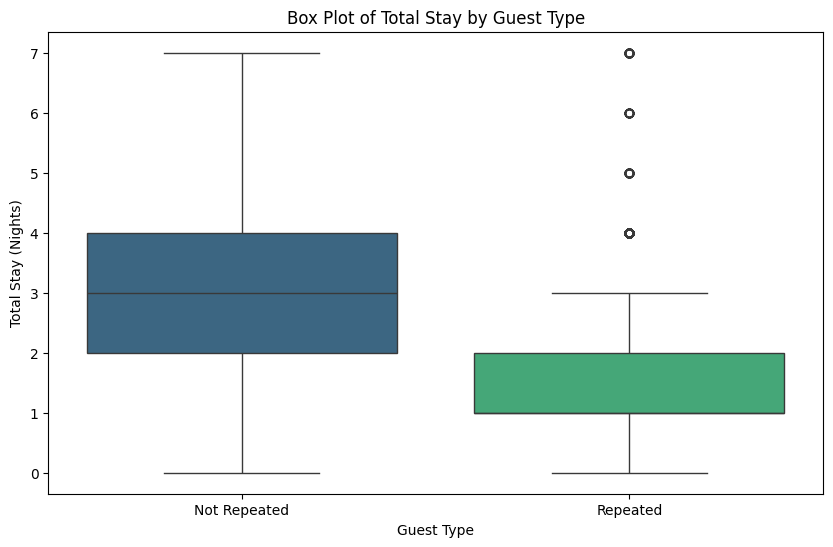

In [ ]:
#Box Plot of Total Stay by Guest Type
box_plot()

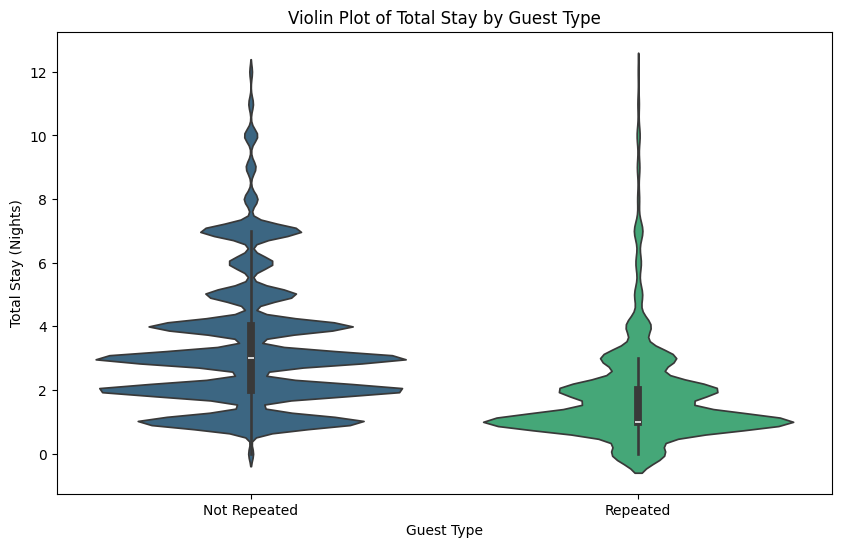

In [ ]:
#Violin Plot of Total Stay by Guest Type
violin_plot()

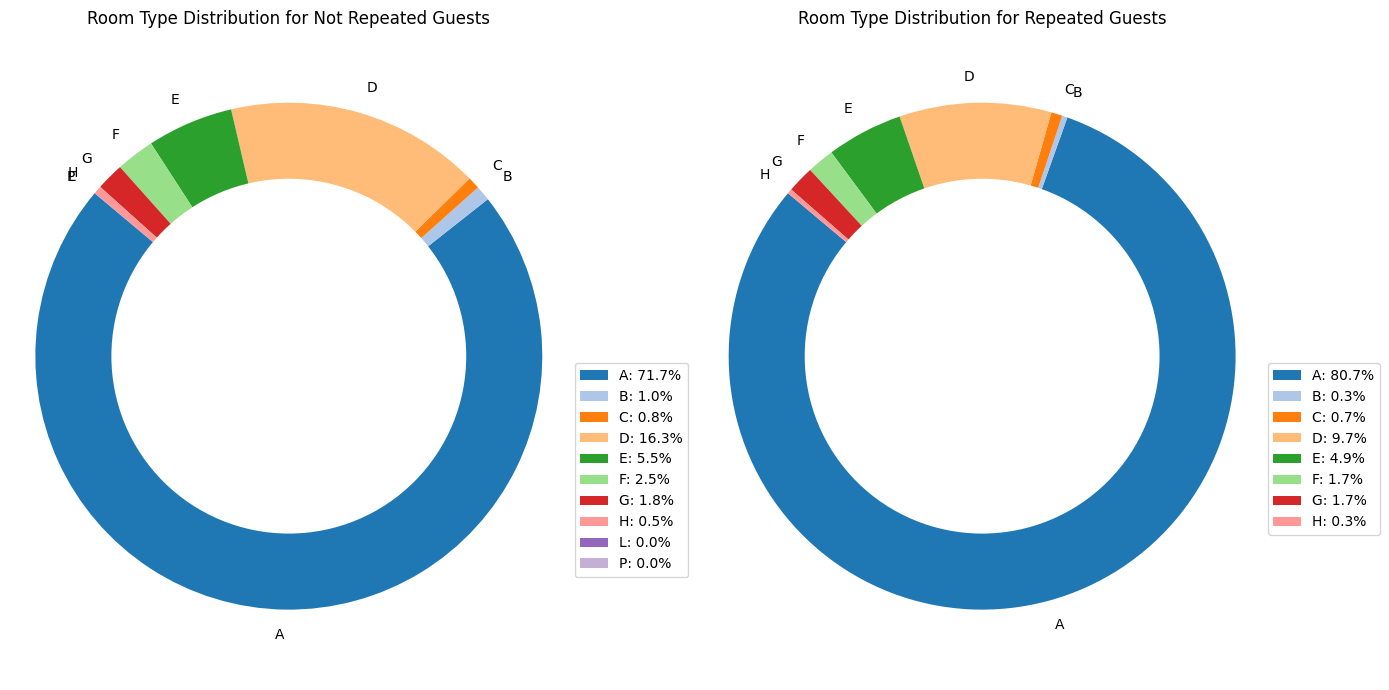

In [ ]:
#Room Type Distribution for Repeated and Non-Repeated Guests By Donut Chart
donut_chart()

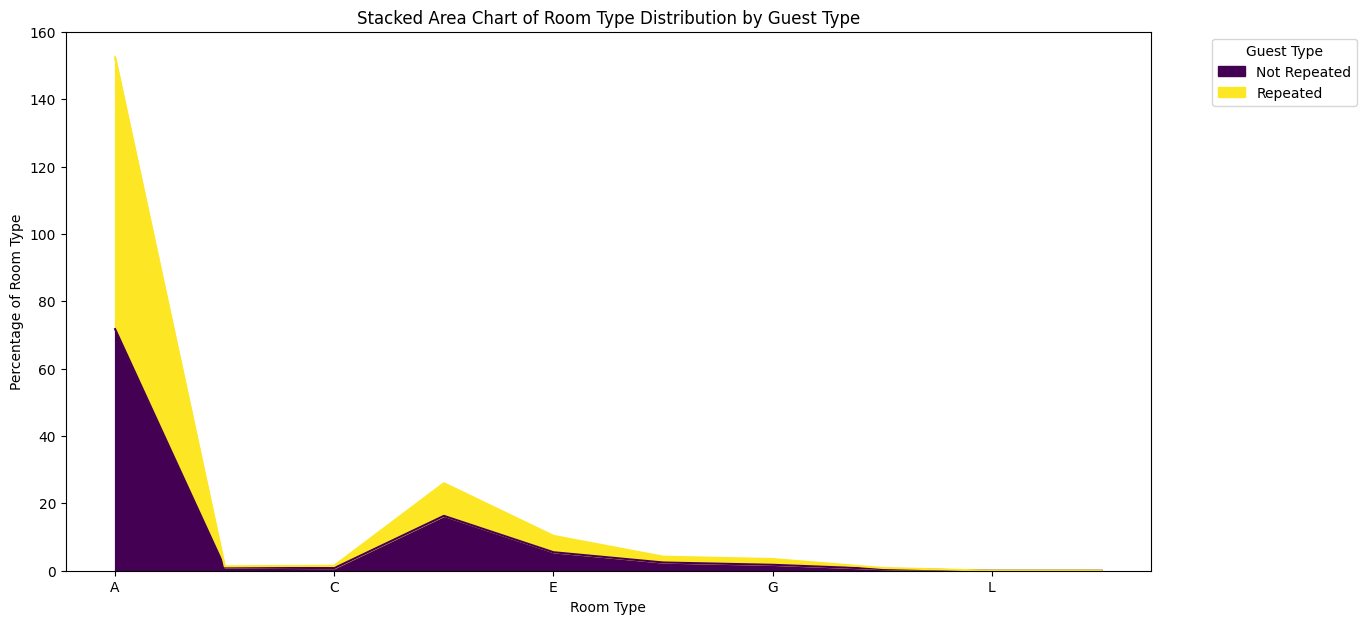

In [ ]:
# Stacked Area Chart for Room Type Distribution by Guest Type
Stacked_Chart()


Meal Distribution by Guest Type:
| Guest Type   | Meal      | count   | Percentage Meal   |
|:-------------|:----------|:--------|:------------------|
| Not Repeated | BB        | 88837   | 76.86             |
| Not Repeated | FB        | 789     | 0.68              |
| Not Repeated | HB        | 14277   | 12.35             |
| Not Repeated | SC        | 10540   | 9.12              |
| Not Repeated | Undefined | 1137    | 0.98              |
| Repeated     | BB        | 3473    | 91.15             |
| Repeated     | FB        | 9       | 0.24              |
| Repeated     | HB        | 186     | 4.88              |
| Repeated     | SC        | 110     | 2.89              |
| Repeated     | Undefined | 32      | 0.84              |


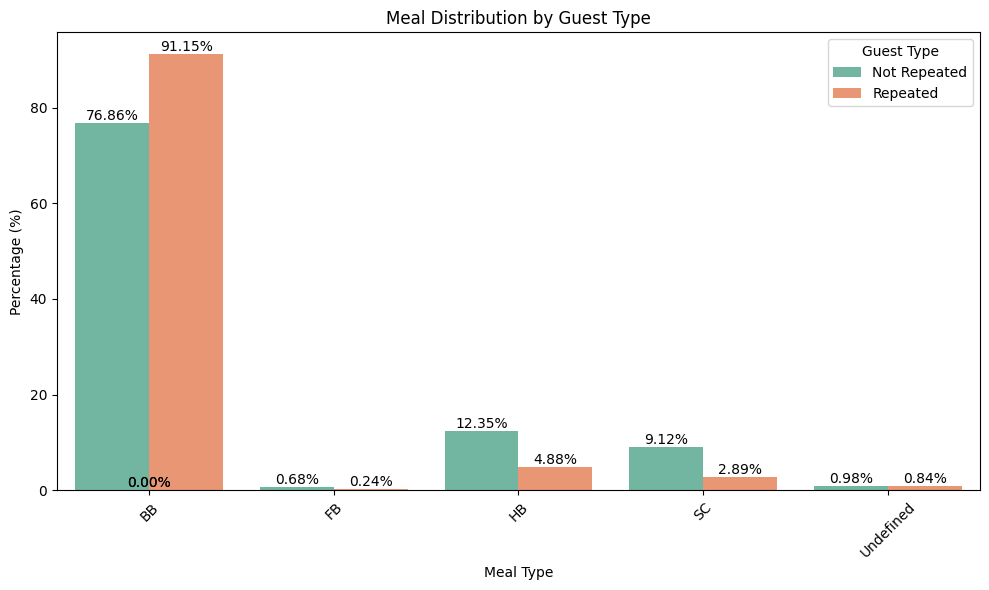

In [ ]:
# @title 6. Are repeated guests more likely to have specific preferences in the meal?

agg_df_meal = df_cleaned.groupby(['is_repeated_guest', 'meal']).size().reset_index(name='count')

agg_df_meal = agg_df_meal.groupby('is_repeated_guest', group_keys=True).apply(lambda x: x.assign(percentage_meal=round(100 * x['count'] / x['count'].sum(), 2))).reset_index(drop=True)

agg_df_meal = agg_df_meal.rename(columns={'is_repeated_guest': 'Guest Type', 'meal': 'Meal', 'percentage_meal': 'Percentage Meal'})


agg_df_meal['Guest Type'] = agg_df_meal['Guest Type'].replace({0: 'Not Repeated', 1: 'Repeated'})


print("\nMeal Distribution by Guest Type:")
print(agg_df_meal.to_markdown(index=False, numalign="left", stralign="left"))

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot
ax = sns.barplot(
    data=agg_df_meal,
    x='Meal',
    y='Percentage Meal',
    hue='Guest Type',
    palette='Set2'
)

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}%',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='center',
        xytext=(0, 5),  # 5 points vertical offset
        textcoords='offset points'
    )

# Customize the plot
plt.title('Meal Distribution by Guest Type')
plt.xlabel('Meal Type')
plt.ylabel('Percentage (%)')
plt.legend(title='Guest Type')
plt.xticks(rotation=45)  # Rotate meal type labels if needed

# Show the plot
plt.tight_layout()
plt.show()

**Summary:-**

Repeated guests tend to book shorter stays and have a stronger preference for Room Type A and the BB meal type.
Non-repeated guests book longer stays on average and are more likely to choose different room types and meal plans.

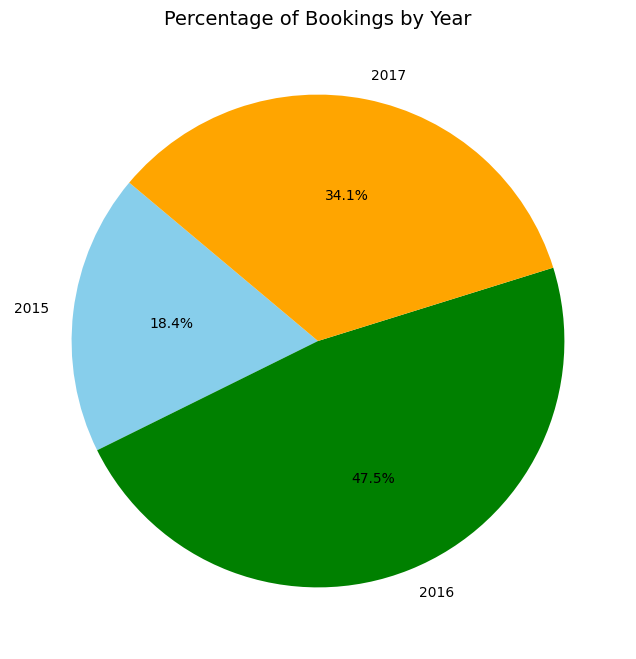

In [ ]:
# @title 7. What is the distribution of hotel bookings across different years?
import matplotlib.pyplot as plt

# Calculate `year_counts` by counting the occurrences of each year in the `arrival_date_year` column of `df_cleaned` and sort by year
year_counts = df_cleaned['arrival_date_year'].value_counts().sort_index()

# Display the pie chart with the exact number of bookings for each year as labels
plt.figure(figsize=(8, 8))
# Use `colors` instead of `color` to set the color of the wedges
plt.pie(year_counts.values, labels=year_counts.keys(), autopct='%1.1f%%', startangle=140, colors=['skyblue','green','orange'])
plt.title('Percentage of Bookings by Year', fontsize=14)

# Display both plots side by side
plt.show()

**Summary:-**

The data shows the distribution of hotel bookings across three years: 2015, 2016, and 2017.

The year 2016 had the highest number of bookings, accounting for 48.50% of the total bookings.

The year 2017 had 36.26% of bookings, while 2015 had the lowest with 15.23%.

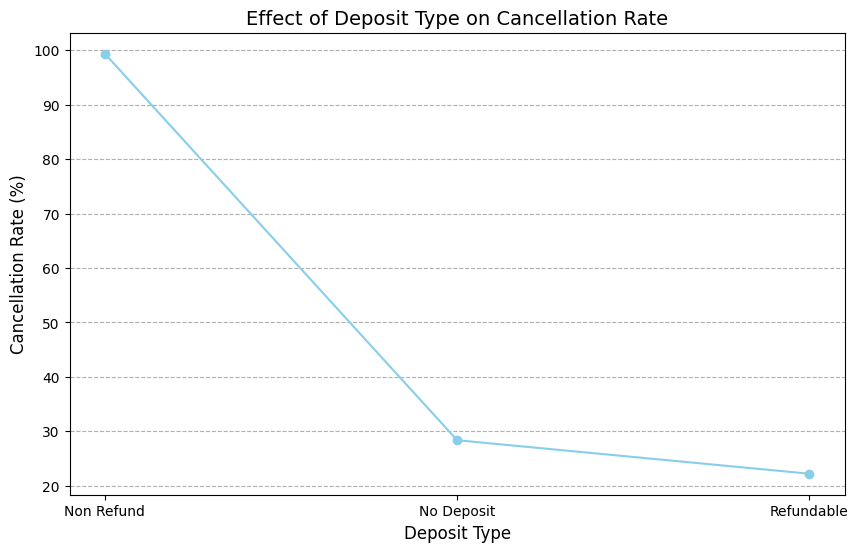

In [ ]:
# @title 8. How does the deposit type (refundable, non-refundable, or no deposit) affect the cancellation rate of hotel bookings?

import matplotlib.pyplot as plt

df_cleaned = pd.read_csv('/content/Hotel Bookings (1).csv')

# Group by `deposit_type` and calculate mean of `is_canceled`
deposit_df = df_cleaned.groupby('deposit_type')['is_canceled'].mean() * 100

# Reset index to create a DataFrame
deposit_df = deposit_df.reset_index()

# Rename the columns
deposit_df = deposit_df.rename(columns={'is_canceled': 'cancellation_rate'})

# Sort by cancellation rate in descending order
deposit_df = deposit_df.sort_values(by='cancellation_rate', ascending=False)

# Create a line plot with markers
plt.figure(figsize=(10, 6))
plt.plot(deposit_df['deposit_type'], deposit_df['cancellation_rate'], marker='o', linestyle='-', color='skyblue')

# Add labels and title
plt.title('Effect of Deposit Type on Cancellation Rate', fontsize=14)
plt.xlabel('Deposit Type', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


**Summary:-**

The analysis reveals a significant impact of deposit type on cancellation rates:

Bookings with a non-refundable deposit have the highest cancellation rate (94.70%).

Bookings with a refundable deposit have the lowest cancellation rate (24.30%).

The difference in cancellation rates between non-refundable and refundable deposits is substantial (70.40%).

This suggests that the deposit type is a strong predictor of whether a booking will be canceled, with non-refundable deposits leading to much higher cancellation rates compared to refundable deposits. This insight could be valuable for hotels in determining their deposit policies and managing cancellation risks.

# Conclusion

1. **Price Comparison**:
   - City Hotels have a higher average daily rate (ADR) of $105.30 compared to Resort Hotels, which have an ADR of $94.95.
   - Resort Hotels are generally more budget-friendly.

2. **Lead Time and Cancellation Risk**:
   - Shorter lead times are associated with lower cancellation risks.
   - Bookings made closer to the travel date have a reduced likelihood of cancellation.

3. **Booking Channels**:
   - The Travel Agent/Tour Operator (TA/TO) channel has the highest average lead time but also the highest cancellation rate, suggesting a need to explore other booking channels.
   - Channels like Undefined and GDS have shorter lead times and lower cancellation rates.

4. **Guest Preferences**:
   - Repeated guests typically book shorter stays and prefer Room Type A and the BB meal plan.
   - Non-repeated guests book longer stays and are more likely to choose diverse room types and meal plans.

5. **Booking Distribution Over Time**:
   - The highest number of bookings occurred in 2016, with a decrease in 2017 and 2015 having the lowest number of bookings.

6. **Impact of Deposit Type on Cancellation Rates**:
   - Non-refundable deposits have a significantly higher cancellation rate (94.70%) compared to refundable deposits (24.30%).
   - The type of deposit is a strong predictor of cancellation rates, with non-refundable deposits leading to much higher cancellations.